<a href="https://colab.research.google.com/github/byoscar88888/SAA_entrega/blob/main/T%C3%A9cnicas/OHE/OHE_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")
df = pd.read_csv('POSIBLE OPCION - Hoja 1.csv')
df

,Fecha,Temporada,Dia_Semana,Ventas_Producto1,Ventas_Producto2,Ventas_Producto3,Temperatura,Promocion,Cantidad_Clientes,Ubicacion,...,Ingresos_Diarios,Calidad_Producto,Demanda_Productos,Ventas_Totales,Nivel_Trafico,Descuentos,Cantidad_Personal,Eventos_Especiales,Publicidad,Clima
0,2023-11-01,Invierno,Miercoles,120,80,150,25,Si,200,Centro,...,5000,alta,alta,350,alta,Si,15,No,Si,Soleado
1,2023-11-02,Invierno,Jueves,100,70,130,24,No,190,Norte,...,4800,media,media,300,media,No,12,Si,Si,Nublado
2,2023-11-03,Invierno,Viernes,130,90,160,23,Si,210,Sur,...,5200,baja,alta,380,baja,Si,18,No,No,Lluvioso
3,2023-11-04,Invierno,Sabado,150,100,180,22,Si,220,Este,...,5500,alta,alta,420,alta,Si,20,Si,Si,Soleado
4,2023-11-05,Invierno,Domingo,140,95,170,21,No,205,Oeste,...,5100,media,media,400,media,No,17,Si,No,Niebla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2024-01-26,Invierno,Lunes,132,92,155,6,Si,230,Este,...,4900,baja,alta,335,alta,Si,21,No,No,Niebla
87,2024-01-27,Invierno,Martes,128,103,152,6,No,215,Oeste,...,5000,alta,alta,375,media,Si,21,No,Si,Lluvioso
88,2024-01-28,Invierno,Miercoles,109,97,133,-2,No,205,Centro,...,5300,baja,media,370,alta,No,19,No,No,Soleado
89,2024-01-29,Invierno,Jueves,130,140,163,-3,Si,210,Norte,...,4900,baja,alta,325,baja,No,15,Si,No,Soleado


In [ ]:
#En este caso me he decantado por eliminar esta columna la cual he creido que es innecesaria.
df = df.drop(['Fecha', 'Temperatura', 'Dia_Semana'],axis='columns')


In [ ]:
# Creación de variables dummy para las columnas categóricas
dummies = pd.get_dummies(df[['Temporada','Promocion', 'Ubicacion', 'Nivel_Trafico', 'Publicidad', 'Clima', 'Competencia_Cercana', 'Calidad_Producto', 'Demanda_Productos', 'Descuentos', 'Eventos_Especiales']])
# Concatenación de las variables dummy al DataFrame original 'df'
marged = pd.concat([df, dummies], axis='columns')

dummies


,Temporada_Invierno,Promocion_No,Promocion_Si,Ubicacion_Centro,Ubicacion_Este,Ubicacion_Norte,Ubicacion_Oeste,Ubicacion_Sur,Nivel_Trafico_alta,Nivel_Trafico_baja,...,Calidad_Producto_alta,Calidad_Producto_baja,Calidad_Producto_media,Demanda_Productos_alta,Demanda_Productos_baja,Demanda_Productos_media,Descuentos_No,Descuentos_Si,Eventos_Especiales_No,Eventos_Especiales_Si
0,1,0,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
2,1,0,1,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
3,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
4,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
87,1,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
88,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
89,1,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1


In [ ]:
# Elimina columnas específicas del DataFrame 'marged' y guarda el resultado en 'final', es decir, una vez convertidas, el tenerlas ahí no nos ayudan en nada ya que nos dará error si las dejamos.
final = marged.drop(['Temporada', 'Promocion', 'Ubicacion', 'Nivel_Trafico', 'Publicidad', 'Clima', 'Competencia_Cercana', 'Hora_Pico', 'Calidad_Producto', 'Demanda_Productos', 'Descuentos', 'Eventos_Especiales'], axis='columns')
final


,Ventas_Producto1,Ventas_Producto2,Ventas_Producto3,Cantidad_Clientes,Ingresos_Diarios,Ventas_Totales,Cantidad_Personal,Temporada_Invierno,Promocion_No,Promocion_Si,...,Calidad_Producto_alta,Calidad_Producto_baja,Calidad_Producto_media,Demanda_Productos_alta,Demanda_Productos_baja,Demanda_Productos_media,Descuentos_No,Descuentos_Si,Eventos_Especiales_No,Eventos_Especiales_Si
0,120,80,150,200,5000,350,15,1,0,1,...,1,0,0,1,0,0,0,1,1,0
1,100,70,130,190,4800,300,12,1,1,0,...,0,0,1,0,0,1,1,0,0,1
2,130,90,160,210,5200,380,18,1,0,1,...,0,1,0,1,0,0,0,1,1,0
3,150,100,180,220,5500,420,20,1,0,1,...,1,0,0,1,0,0,0,1,0,1
4,140,95,170,205,5100,400,17,1,1,0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,132,92,155,230,4900,335,21,1,0,1,...,0,1,0,1,0,0,0,1,1,0
87,128,103,152,215,5000,375,21,1,1,0,...,1,0,0,1,0,0,0,1,1,0
88,109,97,133,205,5300,370,19,1,1,0,...,0,1,0,0,0,1,1,0,1,0
89,130,140,163,210,4900,325,15,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [ ]:
# Elimina columnas específicas del DataFrame 'final' y guarda el resultado en 'final'. En este caso elimintamos una columna de cada grupo de columnas para que sea mas preciso ya que cuanto menos tenga que predecir mejor.
final = final.drop(['Ubicacion_Centro', 'Calidad_Producto_alta', 'Demanda_Productos_alta', 'Nivel_Trafico_alta', 'Clima_Soleado'], axis='columns')


In [ ]:
# Selecciona todas las columnas del DataFrame 'final' excepto 'Ventas_Producto3'
X, y = final.drop(['Ventas_Totales'], axis='columns'), final['Ventas_Totales']
X



,Ventas_Producto1,Ventas_Producto2,Ventas_Producto3,Cantidad_Clientes,Ingresos_Diarios,Cantidad_Personal,Temporada_Invierno,Promocion_No,Promocion_Si,Ubicacion_Este,...,Competencia_Cercana_No,Competencia_Cercana_Si,Calidad_Producto_baja,Calidad_Producto_media,Demanda_Productos_baja,Demanda_Productos_media,Descuentos_No,Descuentos_Si,Eventos_Especiales_No,Eventos_Especiales_Si
0,120,80,150,200,5000,15,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,100,70,130,190,4800,12,1,1,0,0,...,0,1,0,1,0,1,1,0,0,1
2,130,90,160,210,5200,18,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
3,150,100,180,220,5500,20,1,0,1,1,...,0,1,0,0,0,0,0,1,0,1
4,140,95,170,205,5100,17,1,1,0,0,...,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,132,92,155,230,4900,21,1,0,1,1,...,1,0,1,0,0,0,0,1,1,0
87,128,103,152,215,5000,21,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
88,109,97,133,205,5300,19,1,1,0,0,...,0,1,1,0,0,1,1,0,1,0
89,130,140,163,210,4900,15,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1


Y si en lugar de predecir el total, predigo el tercer numero de ventas (por la noche) y quito la linea de "ventas_totales"? Pregguntarle a cerca del model.poredict

In [ ]:
# Crea un modelo de regresión lineal
model = LinearRegression()
# Ajusta (entrena) el modelo utilizando las características 'X' y la variable objetivo 'y'
model.fit(X, y)


LinearRegression()

In [ ]:
# Realiza predicciones utilizando el modelo entrenado en el conjunto de características 'X'
model.predict(X)


array([354.65963129, 296.89567763, 359.66319305, 415.42492629,
       386.05958299, 328.89997494, 334.5468362 , 373.63525198,
       311.41299902, 385.19912682, 429.50027753, 384.4595907 ,
       346.17430117, 365.98945973, 380.05708468, 337.35248226,
       370.15602277, 433.09792408, 411.24355756, 330.23306144,
       367.20422506, 353.61808064, 334.63980153, 403.77114663,
       438.87227838, 423.36589679, 341.06201824, 392.0809564 ,
       378.46549353, 339.62057584, 379.56610581, 372.91731706,
       354.16600552, 359.14523446, 360.03085474, 341.17325981,
       401.28254968, 390.51429136, 393.33929706, 362.89619797,
       358.20254496, 367.29541801, 324.95095796, 373.47353572,
       444.78628816, 398.04880618, 366.51555025, 339.92486451,
       392.40167986, 341.86583624, 335.24265579, 387.06466493,
       438.18020128, 402.27007907, 348.37383806, 385.50302676,
       384.67618847, 310.50404314, 384.71584351, 404.47296289,
       359.69623991, 331.34577961, 343.87772453, 353.64

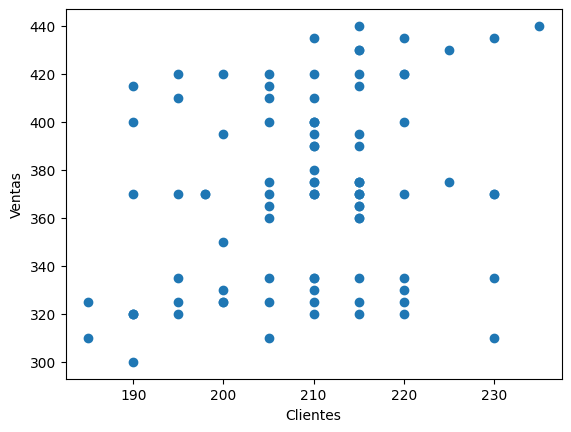

In [ ]:
# etiqueta del eje x
plt.xlabel('Clientes')
# etiqueta del eje y
plt.ylabel('Ventas')
# Crea un gráfico de dispersión
plt.scatter(final['Cantidad_Clientes'], final['Ventas_Totales'])
plt.show()


In [ ]:
# Selecciona las columnas numéricas del DataFrame 'df'
numeric_columns = df.select_dtypes(include='number').columns

# Crea un nuevo DataFrame 'df_numeric' con las columnas numéricas seleccionadas y rellena los valores NaN con 0
df_numeric = df[numeric_columns].fillna(0)

# Crea un modelo de regresión lineal
reg = linear_model.LinearRegression()

# Entrena el modelo utilizando las columnas numéricas
reg.fit(df_numeric.drop('Ventas_Totales', axis='columns'), df_numeric['Ventas_Totales'])

# Configura la forma en que se muestran los valores flotantes en el DataFrame
pd.set_option('display.float_format', '{:.6f}'.format)

# Realiza predicciones utilizando el modelo entrenado en las columnas numéricas
predicciones = reg.predict(df_numeric.drop('Ventas_Totales', axis='columns'))

# Nombre de la columna que almacenará las predicciones
nombre_columna_prediccion = 'Ventas_Totales_Prediccion'

# Elimina la columna de predicciones si ya existe en el DataFrame
if nombre_columna_prediccion in df:
    df.drop


In [ ]:
# Calcula el coeficiente de acierto
model.score(X, y)


0.644890405542893

In [ ]:
# Importar la función train_test_split de scikit-learn para dividir los datos
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_2, X_test, y_2, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo2 = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
modelo2.fit(X_2, y_2)

# Realizar predicciones en el conjunto de prueba utilizando el modelo entrenado
prueba = modelo2.predict(X_test)

prueba

array([343.86176661, 333.71262428, 385.17307127, 381.74348085,
       360.88942893, 343.77117635, 369.9838315 , 407.76237558,
       428.57129974, 450.89261673, 330.10645089, 347.1581126 ,
       398.39968265, 342.21833199, 350.00985033, 378.09855109,
       405.22007803, 379.95412761, 334.08417271])

In [ ]:
# Calcula el coeficiente de acierto del 80/20
modelo2.score(X_2,y_2)

0.6386272622515399